In [1]:
import pandas as pd

In [2]:
ds=pd.read_csv("IRIS.csv")

In [3]:
ds


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
ds.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
import matplotlib.pyplot as plt 

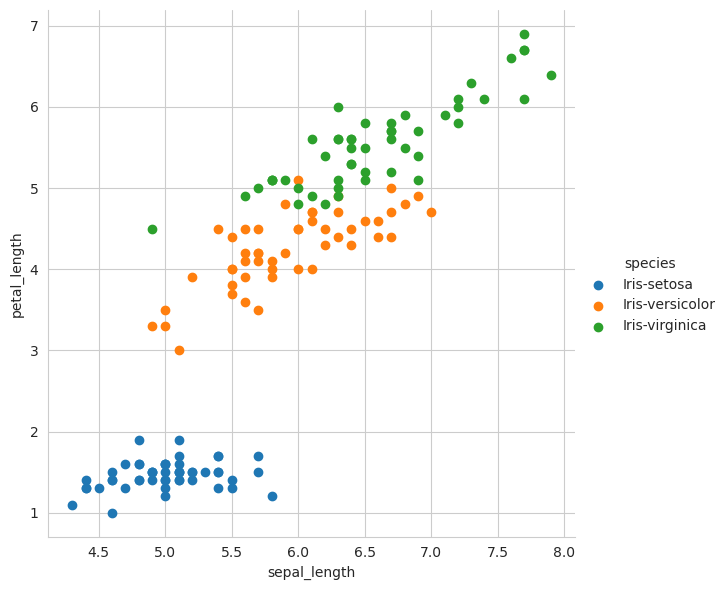

In [7]:
import seaborn as sns
sns.set_style("whitegrid")
sns.FacetGrid(ds, hue ="species",height=6).map(plt.scatter,'sepal_length','petal_length').add_legend()


In [8]:
# Splitting the Dataset : 
X=ds.iloc[:,:-1]
Y=ds.iloc[:,-1]

In [9]:
# Encoding the target Dataset :
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
Y=le.fit_transform(Y)

In [10]:
# Y.ndim
# Dimensoins of  target Column: 
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [11]:
# We Can see that :
# 0 to Iris-setosa
# 1 to Iris-versicolor
# 2 to Iris-verginica

In [12]:
# Separating the Taining and Testing Data .
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(X,Y,random_state=0,test_size=0.2)

In [13]:
# Now Scaling the Train and Test Data : 
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
scale.fit_transform(X_train)
scale.transform(X_test)

array([[-0.09544771, -0.58900572,  0.72247648,  1.51195265],
       [ 0.14071157, -1.98401928,  0.10361279, -0.29851096],
       [-0.44968663,  2.66602591, -1.35915595, -1.3330616 ],
       [ 1.6757469 , -0.35650346,  1.39760052,  0.73603967],
       [-1.04008484,  0.80600783, -1.30289562, -1.3330616 ],
       [ 0.49495049,  0.57350557,  1.22881951,  1.64127148],
       [-1.04008484,  1.03851009, -1.41541629, -1.20374277],
       [ 0.96726906,  0.10850105,  0.49743514,  0.34808318],
       [ 1.0853487 , -0.58900572,  0.55369548,  0.21876435],
       [ 0.25879121, -0.58900572,  0.10361279,  0.08944552],
       [ 0.25879121, -1.05401024,  1.00377816,  0.21876435],
       [ 0.61303014,  0.34100331,  0.38491447,  0.34808318],
       [ 0.25879121, -0.58900572,  0.49743514, -0.03987331],
       [ 0.73110978, -0.58900572,  0.4411748 ,  0.34808318],
       [ 0.25879121, -0.35650346,  0.49743514,  0.21876435],
       [-1.15816448,  0.10850105, -1.30289562, -1.46238043],
       [ 0.14071157, -0.

In [14]:
# Training starts here : 
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [15]:
Y_predict = model.predict(X_test)
Y_predict= pd.Series(Y_predict)
Y_score = model.score(X_test,y_test)

In [16]:
# Predictive Values : 
Y_predict

0     2
1     1
2     0
3     2
4     0
5     2
6     0
7     1
8     1
9     1
10    2
11    1
12    1
13    1
14    1
15    0
16    1
17    1
18    0
19    0
20    2
21    1
22    0
23    0
24    2
25    0
26    0
27    1
28    1
29    0
dtype: int64

In [17]:
# Accuracy of the Model : 
Y_score

1.0

In [18]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import PrecisionRecallDisplay , RocCurveDisplay
from sklearn.metrics import ConfusionMatrixDisplay

In [19]:
# ConfusionMatrixDisplay.from_estimator(model,X_test,y_test,colorbar=False , cmap="Purple_r")
# print.grid(False)

In [20]:
print(classification_report(y_test,Y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [21]:
X_test.ndim


2

In [46]:
import numpy as np

In [47]:
import  gradio as g

In [48]:
def Iris_identfier():
    x1 = float(input("Enter Speal_length"))
    x2 = float(input("Enter Speal_width"))
    x3 = float(input("Enter petal_length"))
    x4 = float(input("Enter petal_width"))
    new_input=np.array([[x1,x2,x3,x4]])
    model.predict(new_input)
    try:
        if model.predict(new_input)== 0 :
            print('iris-setosa')
        if model.predict(new_input)== 1 :
            print('Iris-versicolor')
        if model.predict(new_input)== 2 :
            print('Iris-virginica')
    except ValueError:
        print("Enter floating or interger Value !! ")